In [1]:
import numpy as np
myfile = np.fromfile('data.bin', dtype='uint16')
print(myfile.shape)

(96012,)


In [2]:
myfile = np.delete(myfile,[0,1,2,3])
myfile = np.delete(myfile,[0,1,2,3])
myfile = np.delete(myfile,[0,1,2,3])
myfile = myfile.reshape(24000,4)
print(myfile[:,1].shape)
#myfile.reshape()

(24000,)


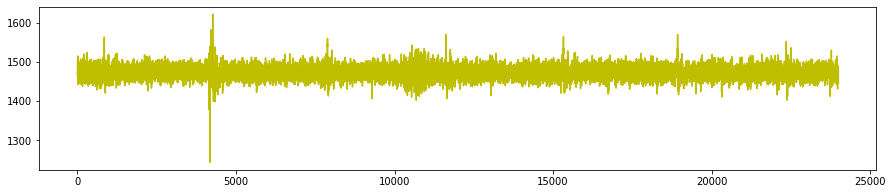

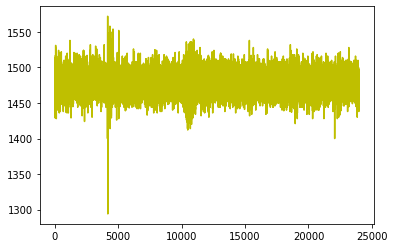

[ 0.          0.          0.         ... -0.13731182 -0.13851823
 -0.14047993]


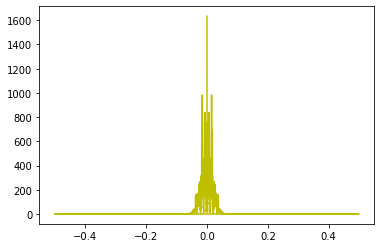

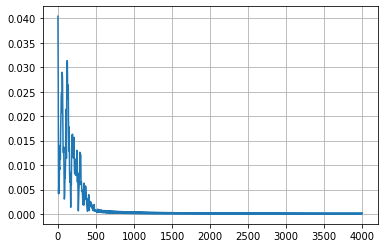

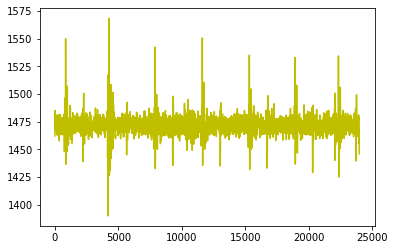

In [14]:
import scipy.io.wavfile as wavf
import matplotlib.pyplot as pp
from scipy import signal
val = 1 # this is the value where you want the data to appear on the y-axis.
# just as an example array

pp.figure(figsize=(15,3))
pp.plot(myfile[:,2], 'y')
pp.show()
pp.plot(myfile[:,3], 'y')
pp.show()
from scipy.io import wavfile
samplerate, fftarray = wavfile.read('reduced.wav')
fftarray = fftarray[3000:5000] #4257:4275
print(fftarray)
fftResult = np.fft.fft(fftarray)
freq = np.fft.fftfreq(2000)
pp.plot(freq, fftResult.real**2 + fftResult.imag**2, 'y')
#pp.plot(fftResult, 'y')
pp.show()

# Number of sample points
N = 2000
# sample spacing
T = 1.0 / 8000.0
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(fftResult[0:N//2]))
plt.grid()
plt.show()
b,a = signal.butter(6, 0.1, 'low', analog=False, output='ba')
output = signal.filtfilt(b, a, myfile[:,2])
pp.plot(output, 'y', label='filtered') # cutoff frequency
pp.show()


In [4]:
samples = np.delete(myfile,[0,1,3],axis=1)
samples=samples.flatten()

samples2 = np.delete(myfile,[0,1,2],axis=1)
samples2=samples2.flatten()
print(samples[0])
print(samples2[0])
a1=samples.tolist()
a2=samples2.tolist()
noiseRed = []
av = np.average(samples2)
for i in range(len(a1)):
    noiseRed.append(a1[i]-av)

1463
1468


In [5]:
samples=samples/1000
#samples=samples/1.0
mean = np.mean(samples)
samples = samples - mean
samples = samples.round(2)
print(samples.shape)
xf = np.nonzero(samples > 0.0)
fs = 8000
out_f = 'out.wav'
print(samples)
output=output/1000
wavf.write(out_f, fs, samples)
wavf.write("buttered.wav", fs, output)



(24000,)
[-0.01  0.01  0.01 ...  0.02 -0.01 -0.03]


In [6]:
samples2=samples2/1000
print(samples2.shape)
fs = 8000
out_f = 'out1.wav'
print(samples2)
wavf.write(out_f, fs, samples2)


(24000,)
[1.468 1.47  1.492 ... 1.476 1.466 1.48 ]


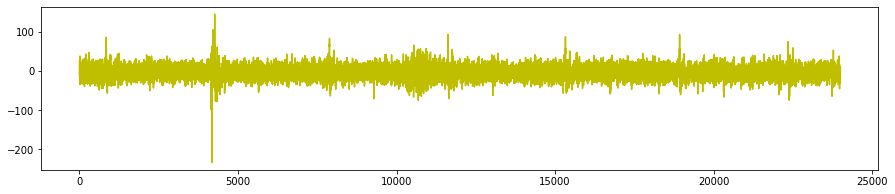

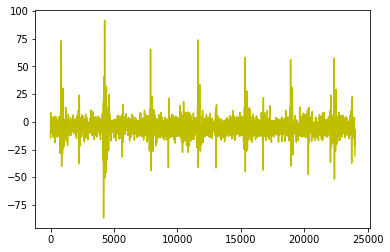

beats per second :  7
beats per minute :  140


In [7]:
pp.figure(figsize=(15,3))
pp.plot(noiseRed, 'y')
pp.show()

b,a = signal.butter(6, 0.1, 'low', analog=False, output='ba')
output = signal.filtfilt(b, a, noiseRed)
pp.plot(output, 'y', label='filtered') # cutoff frequency
pp.show()
beats=0
cnt=0;
for i in range(len(output)):
    if output[i]>40:
        if cnt==0:
            beats+=1
        cnt+=1
        if cnt >= 15:
            cnt=0
for i in range(4000):
    output = np.insert(output, 0, 0, axis=0)
for i in range(4000):
    output = np.insert(output, len(output)-1, 0, axis=0)

output=output/100
#output=output-np.average(output)
wavf.write("reduced.wav", fs, output)
print("beats per second : ", beats)
print("beats per minute : ", beats*20)